In [40]:
import skimage
from skimage import io
import os
import matplotlib.pyplot as plt


filename = os.path.join('screenshots', 'MiniMetro1.png')
camera = io.imread(filename)

from skimage import filters

gray_camera = skimage.color.rgb2gray(camera)

val = 0.5
print(val)
mask = gray_camera > val

0.5


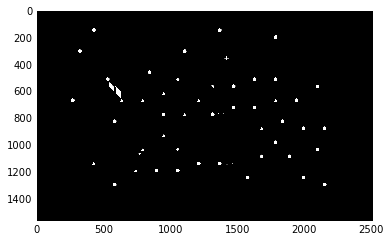

In [64]:
from skimage import measure
all_labels = measure.label(mask, background=0)

%matplotlib inline
plt.imshow(all_labels > 1, cmap='gray')


48
[{'c': 1, 'p': <skimage.measure._regionprops._RegionProperties object at 0x13d92ef28>}, {'c': 1, 'p': <skimage.measure._regionprops._RegionProperties object at 0x13d92e0b8>}, {'c': 1, 'p': <skimage.measure._regionprops._RegionProperties object at 0x13d92e2e8>}, {'c': 1, 'p': <skimage.measure._regionprops._RegionProperties object at 0x13d92e6a0>}, {'c': 1, 'p': <skimage.measure._regionprops._RegionProperties object at 0x13d92e6d8>}, {'c': 1, 'p': <skimage.measure._regionprops._RegionProperties object at 0x13d92e898>}, {'c': 2, 'p': <skimage.measure._regionprops._RegionProperties object at 0x13d92efd0>}, {'c': 2, 'p': <skimage.measure._regionprops._RegionProperties object at 0x13d92eef0>}, {'c': 2, 'p': <skimage.measure._regionprops._RegionProperties object at 0x13d92eeb8>}, {'c': 2, 'p': <skimage.measure._regionprops._RegionProperties object at 0x13d92ee48>}, {'c': 2, 'p': <skimage.measure._regionprops._RegionProperties object at 0x13d92ed30>}, {'c': 2, 'p': <skimage.measure._regionp

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


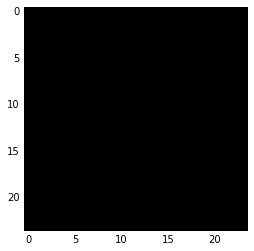

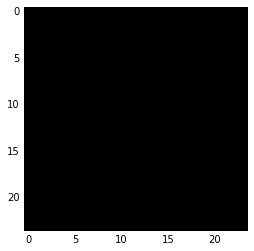

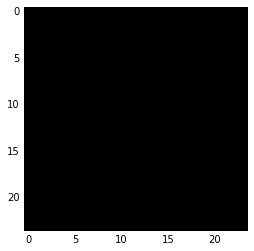

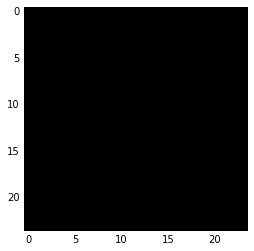

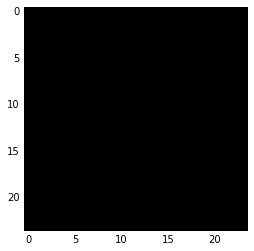

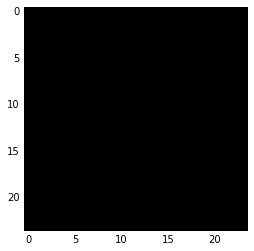

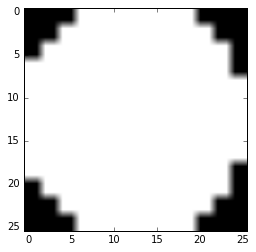

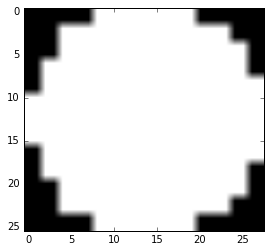

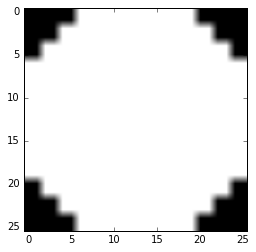

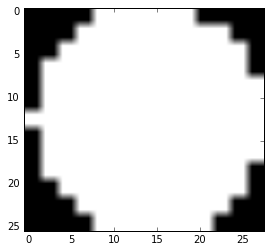

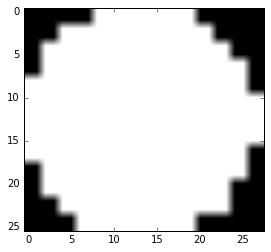

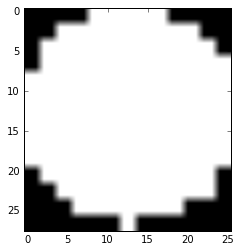

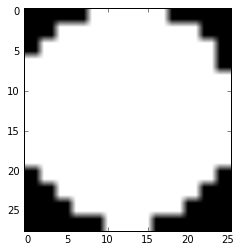

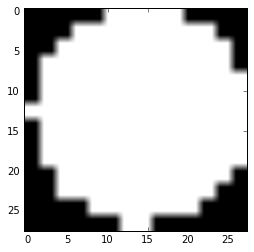

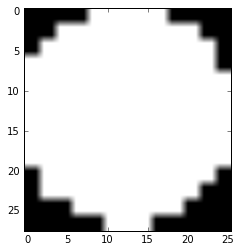

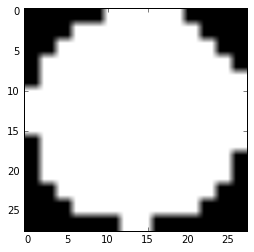

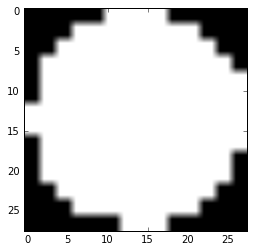

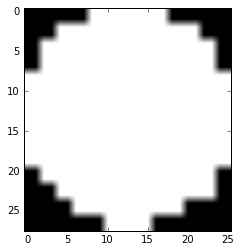

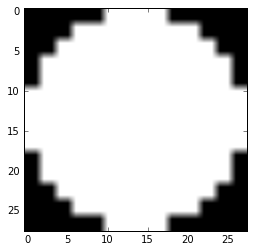

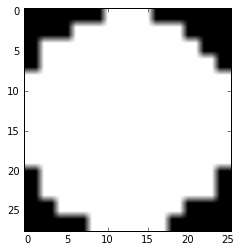

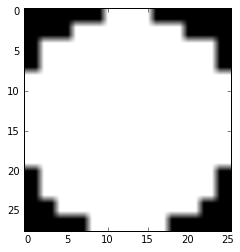

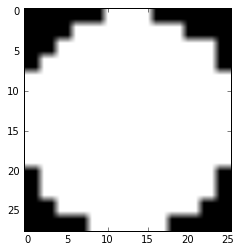

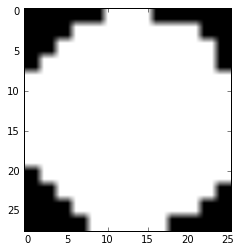

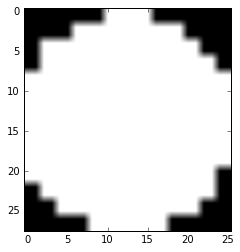

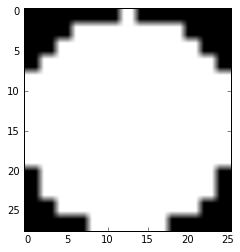

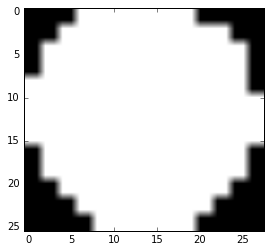

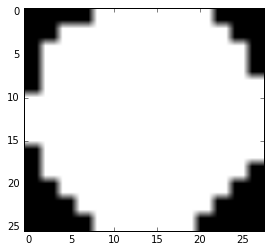

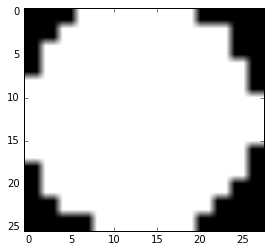

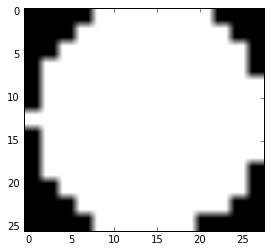

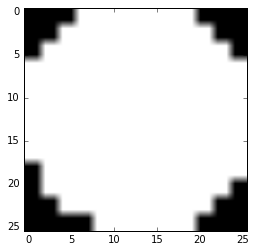

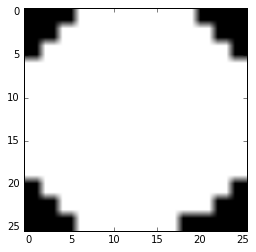

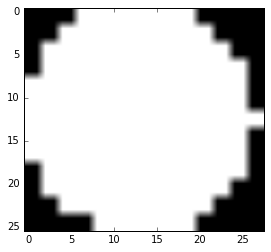

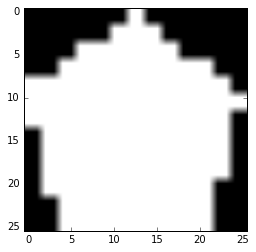

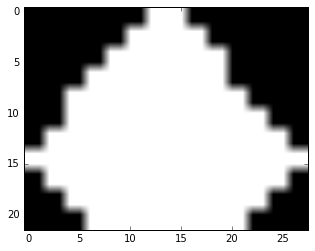

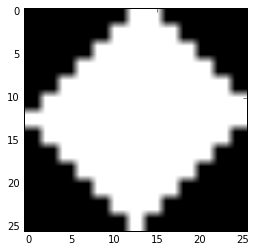

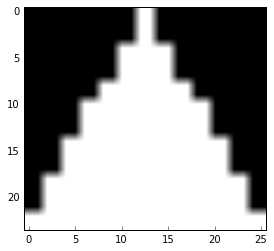

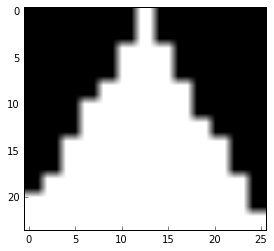

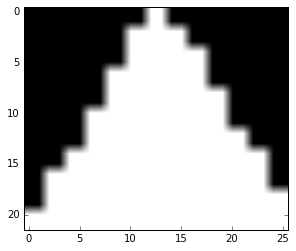

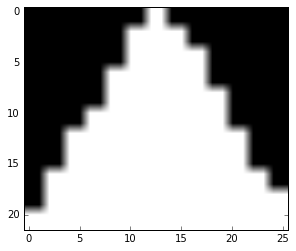

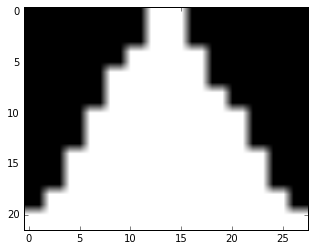

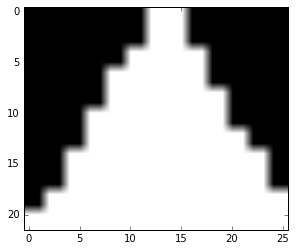

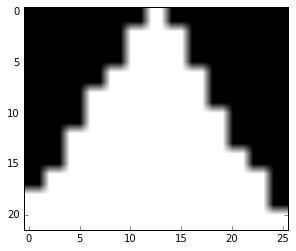

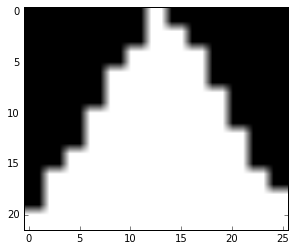

In [ ]:
import numpy as np
import scipy

props = [p for p in measure.regionprops(all_labels) if min(p.bbox[2] - p.bbox[0], p.bbox[3] - p.bbox[1]) > 15 and max(p.bbox[2] - p.bbox[0], p.bbox[3] - p.bbox[1]) < 30]
print(len(props))

distance_matrix = []

for i, p1 in enumerate(props):
    for p2 in props[i + 1:]:

        new_shape = np.maximum(np.array(p1.image.shape), np.array(p2.image.shape))

        cur_image = np.empty(new_shape, dtype=bool)
        cur_image.fill(False)
        cur_image[0:p1.image.shape[0],0:p1.image.shape[1]] = p1.image

        def_image = np.empty(new_shape, dtype=bool)
        def_image.fill(False)
        def_image[0: p2.image.shape[0], 0: p2.image.shape[1]] = p2.image

        mse = measure.compare_mse(def_image, cur_image)

#         print(p.label, mse, p.area, p.filled_area, p.centroid, p.convex_area)

        distance_matrix.append(mse)

#     print(p.image)
#     plt.figure()
#     plt.imshow(p.image, cmap='gray')

# print(distance_matrix)
Z = scipy.cluster.hierarchy.single(distance_matrix)
# print(Z)
clusters = scipy.cluster.hierarchy.fcluster(Z, 0.1, 'distance')

points = []

for p, c in zip(props, clusters):
    points.append({'p': p, 'c': c})

points.sort(key=lambda x: x['c'])
print(points)

for p in points:
    plt.figure()
    plt.imshow(p['p'].image, cmap='gray')